<a href="https://colab.research.google.com/github/raghavadevarajeurs/DeepLearning/blob/main/Blackbox_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and setup fastbook by providing the authentication key from linked google account

Set the runtime processor to GPU


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 10.2MB/s 
     |████████████████████████████████| 194kB 18.9MB/s 
     |████████████████████████████████| 1.2MB 18.2MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

CNN_LEARNER for Image classification

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()
dlr = ImageDataLoaders.from_name_func( path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_dog, item_tfms=Resize(224))

cnnlearn = cnn_learner(dlr, resnet34, metrics=error_rate)
cnnlearn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.142669,0.014066,0.005413,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.060464,0.007372,0.002030,00:51


In [ ]:
uploaders = widgets.FileUpload()
uploaders 

FileUpload(value={}, description='Upload')

In [ ]:
image = PILImage.create(uploaders.data[0])

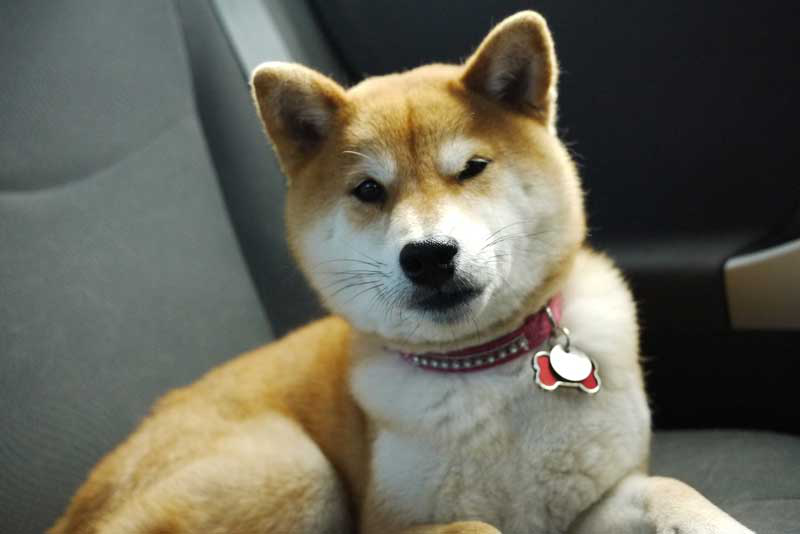

In [ ]:
image

In [ ]:
imgs = PILImage.create(uploaders.data[0])
is_dog,_,probs = cnnlearn.predict(imgs)
print(f"Is this a picture of Dog?: {is_dog}.")
print(f"Probability that its a dog: {probs[1].item():.6f}")

Is this a picture of Dog?: True.
Probability that its a dog: 0.999994


#Model for image classification using segmentation


In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str))

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.207326,4.201483,00:01


epoch,train_loss,valid_loss,time
0,2.586451,2.217287,00:01
1,2.095857,1.450273,00:01
2,1.782241,1.434141,00:01
3,1.565980,1.150497,00:01
4,1.396373,1.027044,00:01
5,1.253272,0.909773,00:01
6,1.130557,0.895188,00:01
7,1.035002,0.870711,00:01


In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,4.293560,2.642473,00:01


epoch,train_loss,valid_loss,time
0,2.192268,1.684977,00:01
1,1.784139,1.325740,00:01
2,1.533168,1.057723,00:01
3,1.367270,0.991367,00:01
4,1.229025,0.817781,00:01
5,1.108889,0.729194,00:01
6,1.010379,0.695346,00:01
7,0.934462,0.682973,00:01


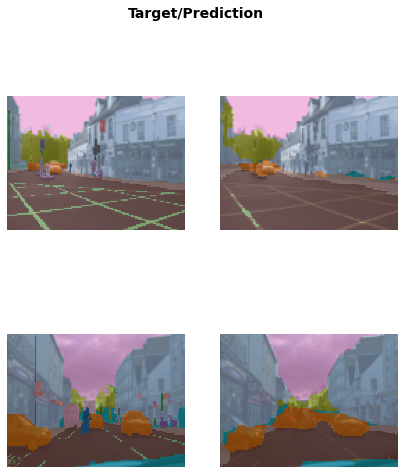

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

#Model for text classification, which can be leveraged in sentiment analysis.

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.460930,0.393832,0.826000,02:52


epoch,train_loss,valid_loss,accuracy,time
0,0.300483,0.229452,0.907560,05:42
1,0.242898,0.214273,0.915560,05:43
2,0.191403,0.184367,0.929240,05:42
3,0.148488,0.189520,0.930360,05:41


In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([5.9586e-04, 9.9940e-01]))

In [ ]:
learn.predict("Mass is what indie cinema should be: Incisive, contemplative, questioning, and thought-provoking")

('pos', tensor(1), tensor([0.0021, 0.9979]))

In [ ]:
learn.predict(" Insufferably impressed with its own cleverness, right down to the dumb double entendre title. ")

('pos', tensor(1), tensor([7.7709e-04, 9.9922e-01]))

#Model for data categorization using Decision Tree

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.370191,0.354009,0.831388,00:05
1,0.365500,0.347383,0.837377,00:05
2,0.334971,0.345652,0.839527,00:05


In [ ]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,16.0,5.0,13.0,4.0,2.0,1.0,-1.364773,1.025798,-0.031683,0.0,0.0
1,5.0,16.0,6.0,8.0,2.0,3.0,1.0,0.401194,5.020192,-0.031683,0.0,0.0
2,5.0,12.0,3.0,5.0,1.0,5.0,1.0,-0.628954,-1.428178,-0.424127,1.0,0.0
3,5.0,12.0,3.0,2.0,1.0,5.0,1.0,0.033284,0.959906,-0.424127,0.0,0.0
4,5.0,12.0,3.0,8.0,1.0,5.0,1.0,0.621940,-0.426219,-0.424127,1.0,0.0
5,5.0,12.0,6.0,13.0,3.0,5.0,1.0,-0.776118,1.692078,-0.424127,0.0,0.0
6,5.0,12.0,5.0,4.0,3.0,5.0,1.0,-0.996863,-0.634595,-0.424127,0.0,0.0
7,3.0,13.0,3.0,11.0,1.0,5.0,1.0,1.578505,-0.458399,1.538095,1.0,1.0
8,5.0,16.0,5.0,9.0,4.0,5.0,1.0,-1.291191,3.291676,-0.031683,0.0,0.0


#Ranking performed using Collab_Learner

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.514729,1.423600,00:00


epoch,train_loss,valid_loss,time
0,1.374691,1.366151,00:00
1,1.271550,1.194261,00:00
2,1.036169,0.894817,00:00
3,0.802605,0.747204,00:00
4,0.689884,0.709777,00:00
5,0.640387,0.699993,00:00
6,0.621620,0.695872,00:00
7,0.597086,0.693496,00:00
8,0.595482,0.692502,00:00
9,0.589489,0.692365,00:00


In [ ]:
learn.summary()

EmbeddingDotBias (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 50             
Embedding                                 5050       True      
Embedding                                 5050       True      
____________________________________________________________________________
                     64 x 1              
Embedding                                 101        True      
Embedding                                 101        True      
____________________________________________________________________________

Total params: 10,302
Total trainable params: 10,302
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7fb364d04620>
Loss function: FlattenedLoss of MSELoss()

Model unfrozen

Callbacks:
  - TrainEvalCallback
  - Recorder
  - ProgressCallback

In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,100.0,16.0,4.0,4.490091
1,89.0,78.0,4.0,3.187379
2,63.0,28.0,2.0,2.891756
3,33.0,66.0,3.5,4.013384
4,5.0,85.0,5.0,3.971411
5,95.0,79.0,5.0,3.875701
6,47.0,22.0,4.0,3.961091
7,44.0,19.0,2.5,2.694536
8,14.0,42.0,3.0,3.208606
